In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/just-the-basics-the-after-party/train_labels.csv
/kaggle/input/just-the-basics-the-after-party/train.csv
/kaggle/input/just-the-basics-the-after-party/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('/kaggle/input/just-the-basics-the-after-party/train.csv')
label = pd.read_csv ('/kaggle/input/just-the-basics-the-after-party/train_labels.csv')
test = pd.read_csv ('/kaggle/input/just-the-basics-the-after-party/test.csv')

In [4]:
df = pd.concat([df,label],axis=1)

In [5]:
df.head()

,0.097094,1.1133,45.038,0.88184,0.087009,1.041,1.5486,3.498,1.8578,0.0096729,...,3.6654,0.061607,0.0031605,0.036038,0.0845,2.4517,3.3373,0.065201,0.091158,0
0,0.050086,0.11158,94.0800,1.76500,0.089417,4.80470,0.26742,NaN,0.56473,0.035123,...,4.16870,0.075432,0.010869,0.063972,0.079892,1.9795,3.5064,0.072132,0.091950,1
1,0.088447,2.36340,5.0580,0.14436,0.064547,2.44400,4.25450,0.36506,1.86090,0.009759,...,4.56130,0.046505,NaN,0.084066,0.064829,3.3087,2.9969,0.064328,0.036793,0
2,0.772540,0.59469,NaN,0.97515,0.015987,0.52884,1.48840,3.96100,4.80630,0.048617,...,0.12832,0.065028,0.036862,0.010010,0.020709,2.5237,2.1711,0.080865,0.081553,0
3,0.382410,4.81090,1955.1000,0.46050,0.024453,2.02980,3.74030,4.22810,2.42920,0.156830,...,4.37010,1.001100,0.065750,0.043547,0.629430,4.6262,3.1947,NaN,0.187180,1
4,0.081316,4.84150,4.0507,2.48320,0.058990,2.37940,1.61270,2.04220,1.65710,0.039377,...,2.68040,0.076524,0.082756,0.041953,0.018092,3.3041,0.1922,0.032600,0.050172,0


In [6]:
df.rename(columns={'0':'label'}, inplace=True)

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0.097094,584.0,0.326927,0.545668,0.000445,0.042437,0.079444,0.417108,5.1766
1.1133,589.0,2.560168,1.433962,0.055685,1.354400,2.557500,3.798700,5.0644
45.038,579.0,291.018659,621.837922,1.007800,36.061000,93.081000,279.535000,9163.1000
0.88184,579.0,2.646879,1.446142,0.032513,1.513250,2.596600,3.954600,5.0921
0.087009,574.0,0.182357,0.421245,0.000100,0.031292,0.060234,0.086602,4.6050
...,...,...,...,...,...,...,...,...
2.4517,583.0,2.538304,1.459580,0.020070,1.309750,2.453900,3.832700,5.0737
3.3373,581.0,2.603233,1.420534,0.045843,1.332700,2.604200,3.873200,5.0819
0.065201,580.0,0.182338,0.559537,0.000553,0.033003,0.057520,0.086267,7.6934
0.091158,573.0,0.152419,0.303201,0.000018,0.027388,0.057328,0.092809,3.5881


In [8]:
(df.isnull().sum()/len(df))*100

0.097094    2.504174
1.1133      1.669449
45.038      3.338898
0.88184     3.338898
0.087009    4.173623
              ...   
2.4517      2.671119
3.3373      3.005008
0.065201    3.171953
0.091158    4.340568
label       0.000000
Length: 101, dtype: float64

In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp_mean = IterativeImputer(max_iter=20, random_state=0)

In [10]:
trans_data = imp_mean.fit_transform(df)
df = pd.DataFrame(trans_data, columns = df.columns)

In [11]:
trans_data1 = imp_mean.fit_transform(test)
test = pd.DataFrame(trans_data1, columns = test.columns)

In [12]:
df.head()

,0.097094,1.1133,45.038,0.88184,0.087009,1.041,1.5486,3.498,1.8578,0.0096729,...,3.6654,0.061607,0.0031605,0.036038,0.0845,2.4517,3.3373,0.065201,0.091158,label
0,0.050086,0.11158,94.080000,1.76500,0.089417,4.80470,0.26742,2.534604,0.56473,0.035123,...,4.16870,0.075432,0.010869,0.063972,0.079892,1.9795,3.5064,0.072132,0.091950,1.0
1,0.088447,2.36340,5.058000,0.14436,0.064547,2.44400,4.25450,0.365060,1.86090,0.009759,...,4.56130,0.046505,0.097366,0.084066,0.064829,3.3087,2.9969,0.064328,0.036793,0.0
2,0.772540,0.59469,181.226767,0.97515,0.015987,0.52884,1.48840,3.961000,4.80630,0.048617,...,0.12832,0.065028,0.036862,0.010010,0.020709,2.5237,2.1711,0.080865,0.081553,0.0
3,0.382410,4.81090,1955.100000,0.46050,0.024453,2.02980,3.74030,4.228100,2.42920,0.156830,...,4.37010,1.001100,0.065750,0.043547,0.629430,4.6262,3.1947,-0.049914,0.187180,1.0
4,0.081316,4.84150,4.050700,2.48320,0.058990,2.37940,1.61270,2.042200,1.65710,0.039377,...,2.68040,0.076524,0.082756,0.041953,0.018092,3.3041,0.1922,0.032600,0.050172,0.0


In [13]:
# Function to call all Classification Algorithms
def classification_funct(dataset,column_to_be_studied):
    #importing Classification libraries
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier
    
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import SMOTE
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
       
    # assign x and y
    dataset=dataset[dataset[column_to_be_studied].notnull()]
    x,y=dataset.drop(column_to_be_studied,axis=1),dataset[[column_to_be_studied]]    
    # Using SMOTE for oversampling imbalanced data
    sm = SMOTE(random_state=42)
    x, y = sm.fit_resample(x, y)
    # Scale the dataset
    scaler.fit(x)
    x = scaler.transform(x)
    # split data in train and test
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
    
    # create an instance of each classification algorithm
    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    
    algos=[g,b,KN,SVC,D,R,Log,XGB]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
   
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
        precision_scored.append(precision_score(y_test,item.predict(x_test)))
        recall_scored.append(recall_score(y_test,item.predict(x_test)))
        f1_scored.append(f1_score(y_test,item.predict(x_test)))
    
    # create dataframe with results
    result=pd.DataFrame(columns=['f1_score','recall_score','precision_score','accuracy_score'],index=algo_names)
    result['f1_score']=f1_scored
    result['recall_score']=recall_scored
    result['precision_score']=precision_scored
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [14]:
classification_funct (df, 'label')

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

,f1_score,recall_score,precision_score,accuracy_score
RandomForestClassifier,0.942149,0.919355,0.966102,0.949640
XGBClassifier,0.943089,0.935484,0.950820,0.949640
SVC,0.873950,0.838710,0.912281,0.892086
BernoulliNB,0.862069,0.806452,0.925926,0.884892
LogisticRegression,0.859375,0.887097,0.833333,0.870504
DecisionTreeClassifier,0.837209,0.870968,0.805970,0.848921
GaussianNB,0.808511,0.919355,0.721519,0.805755
KNeighborsClassifier,0.713376,0.903226,0.589474,0.676259


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [16]:
model = Sequential()
# input layer
model.add(Dense(512,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=["accuracy"])

In [17]:
x = df.drop('label',axis=1).values
y = df['label'].values

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# split data in train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Scale the dataset
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform (x_test)

In [19]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
model.fit(x=x_train, 
          y=y_train, 
          epochs=400,
          batch_size=50,
          validation_data=(x_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/400
10/10 [==============================] - 3s 42ms/step - loss: 0.6947 - accuracy: 0.4906 - val_loss: 0.6776 - val_accuracy: 0.6083
Epoch 2/400
10/10 [==============================] - 0s 12ms/step - loss: 0.6854 - accuracy: 0.5595 - val_loss: 0.6667 - val_accuracy: 0.6083
Epoch 3/400
10/10 [==============================] - 0s 12ms/step - loss: 0.6787 - accuracy: 0.5532 - val_loss: 0.6560 - val_accuracy: 0.6167
Epoch 4/400
10/10 [==============================] - 0s 11ms/step - loss: 0.6455 - accuracy: 0.6472 - val_loss: 0.6077 - val_accuracy: 0.6583
Epoch 5/400
10/10 [==============================] - 0s 12ms/step - loss: 0.6000 - accuracy: 0.6764 - val_loss: 0.5338 - val_accuracy: 0.7500
Epoch 6/400
10/10 [==============================] - 0s 11ms/step - loss: 0.5278 - accuracy: 0.7474 - val_loss: 0.4804 - val_accuracy: 0.8000
Epoch 7/400
10/10 [==============================] - 0s 12ms/step - loss: 0.4289 - accuracy: 0.8246 - val_loss: 0.5093 - val_accuracy: 0.7833
Epoch 

<Axes: >

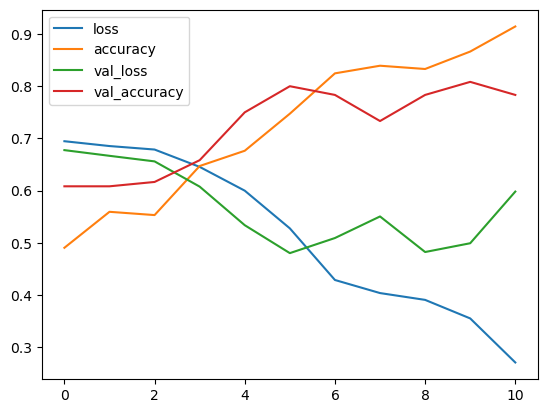

In [20]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [21]:
predictions = model.predict(test)

125/125 [==============================] - 0s 2ms/step


In [22]:
predictions

array([[1.0000000e+00],
       [1.0000000e+00],
       [1.5754264e-13],
       ...,
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00]], dtype=float32)

In [23]:
scores=model.evaluate(x_train,y_train)

15/15 [==============================] - 0s 2ms/step - loss: 0.2645 - accuracy: 0.8727


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               51712     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [25]:
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

accuracy: 87.27%


In [26]:
submission = pd.DataFrame (data=predictions)


In [27]:
submission.head()

,0
0,1.000000e+00
1,1.000000e+00
2,1.575426e-13
3,1.000000e+00
4,1.000000e+00


In [28]:
submission.to_csv('submission.csv', index=False)